In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
print(df.duplicated())
print(df.duplicated().sum())

0        False
1        False
2        False
3        False
4        False
         ...  
99995     True
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool
3854


In [7]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

In [11]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [19]:
df.describe(include = 'object')

,gender,smoking_history
count,96146,96146
unique,3,6
top,Female,never
freq,56161,34398


In [23]:
numeric_cols = []
non_numeric_cols = []

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]) :
        if(df[col].nunique() > 5) : 
            numeric_cols.append(col)
        else:
            non_numeric_cols.append(col)
    else:
        non_numeric_cols.append(col)

In [27]:
print(numeric_cols)
print(non_numeric_cols)

['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
['gender', 'hypertension', 'heart_disease', 'smoking_history', 'diabetes']


# Univariate Analysis for numerical columns

In [30]:
def univariate_analysis(col) :
    fig, ax = plt.subplots(1, 2, figsize=(12,10))    
    sns.histplot(x = df[col], kde = True, bins = 20, color = "cyan", ax = ax[0])
    ax[0].set_title(f'Histogram of {col}')
    
    sns.boxplot(x=df[col],ax=ax[1])
    ax[0].set_title(f'Box Plot of {col}')

Univariate analysis of numeric columns : age
Univariate analysis of numeric columns : bmi
Univariate analysis of numeric columns : HbA1c_level
Univariate analysis of numeric columns : blood_glucose_level


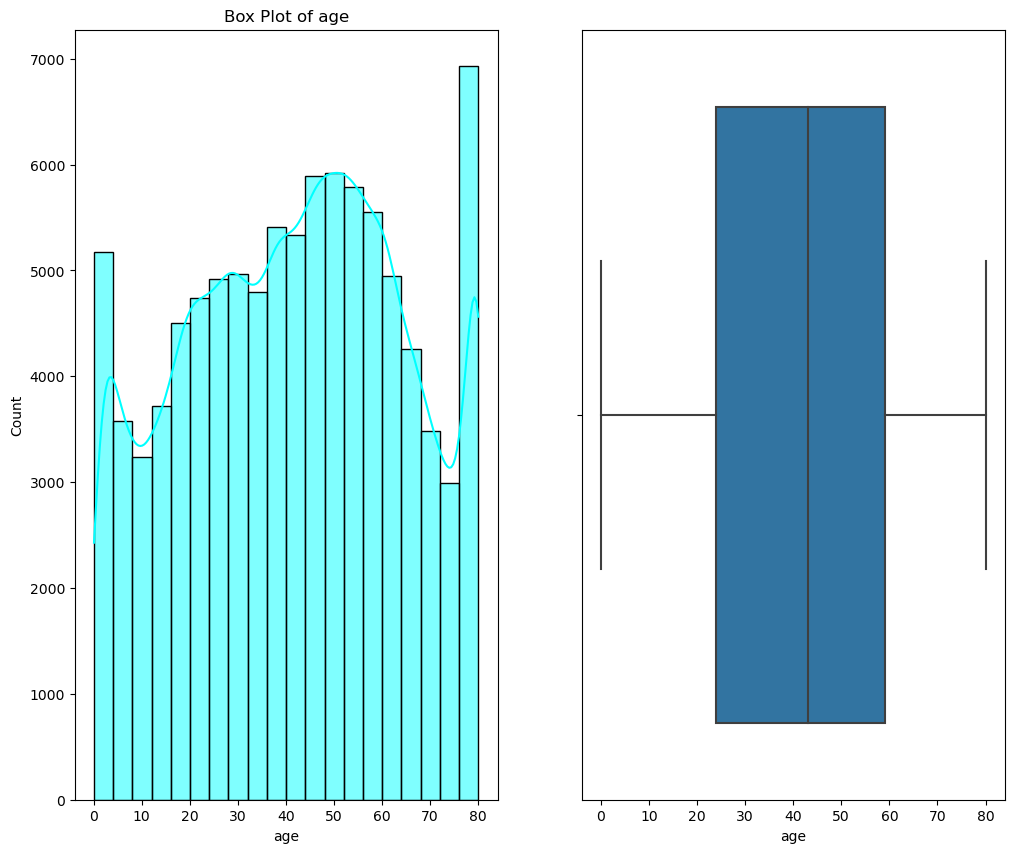

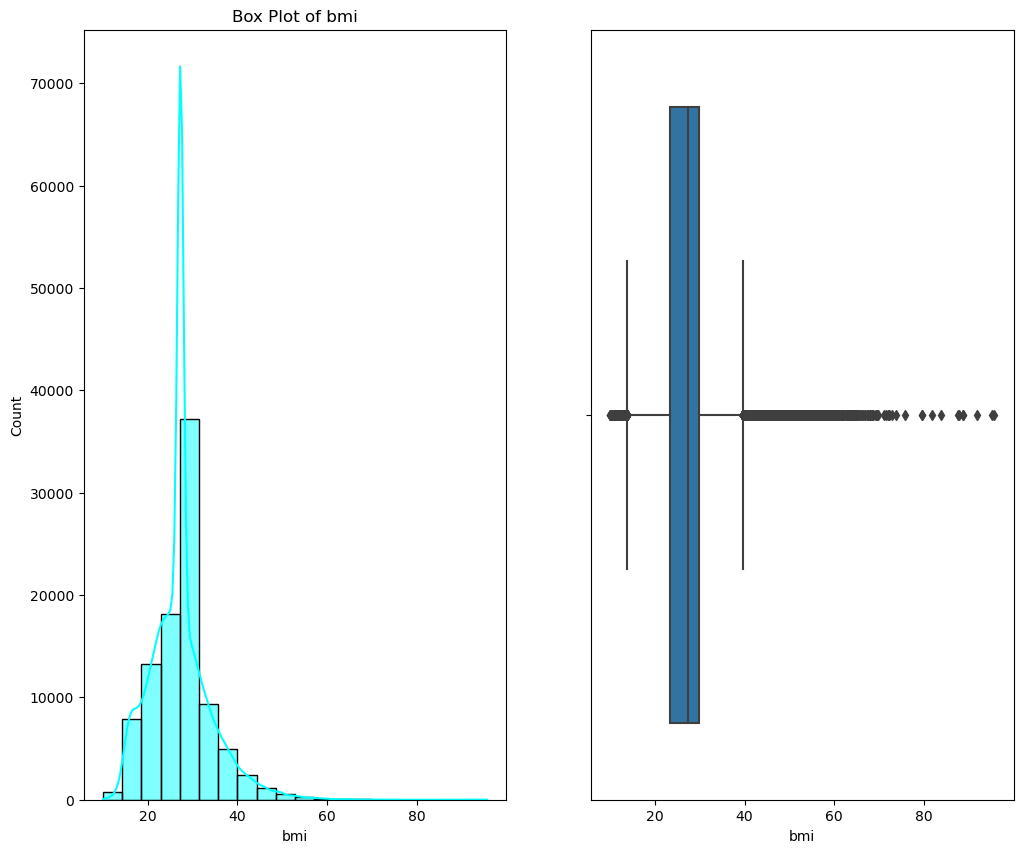

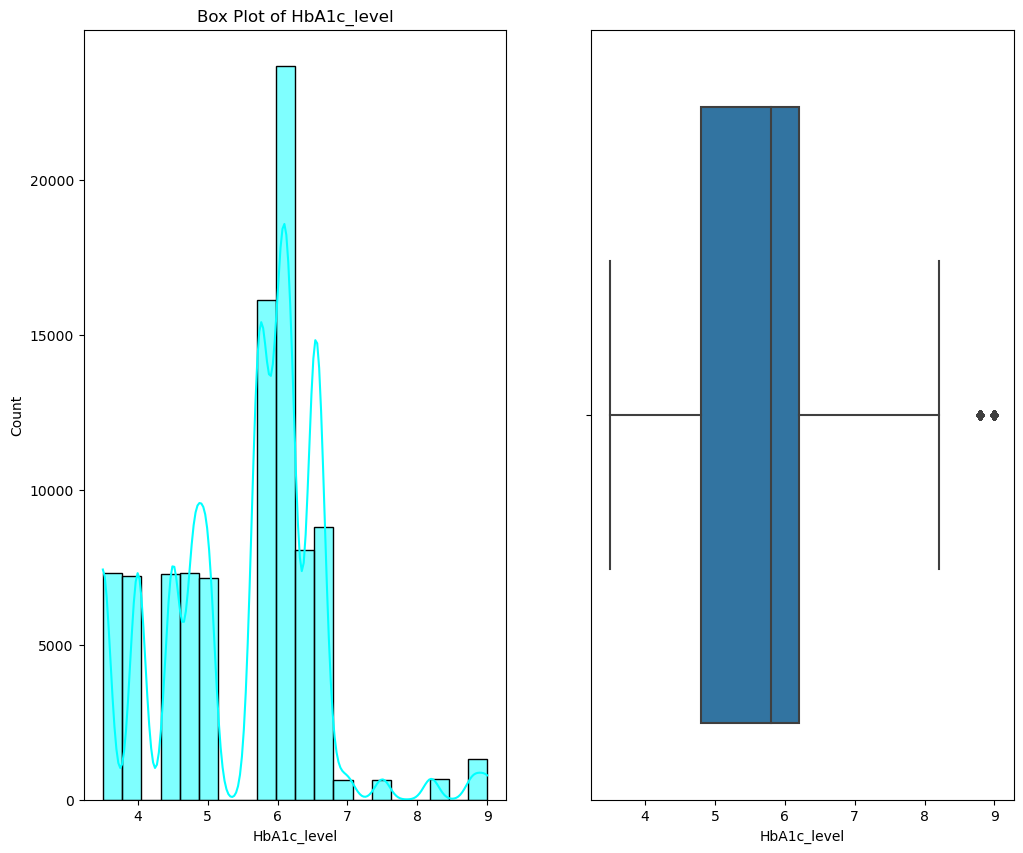

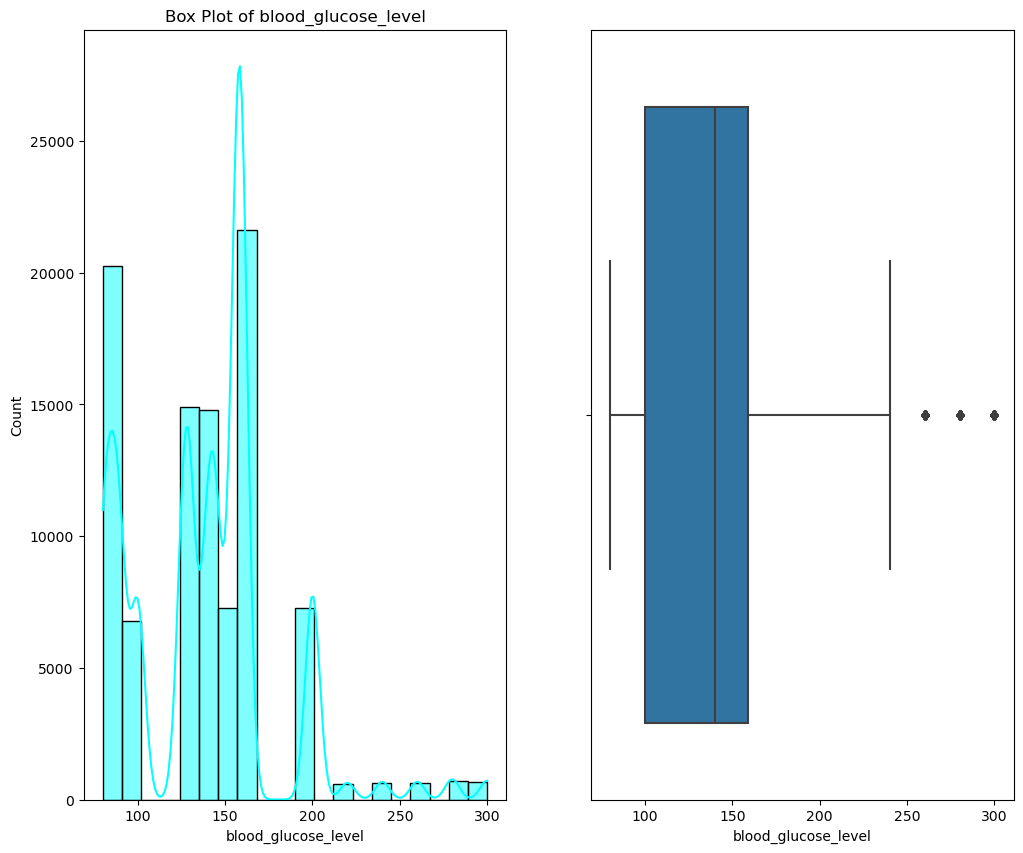

In [31]:
for col in numeric_cols:
    print(f'Univariate analysis of numeric columns : {col}')
    univariate_analysis(col)

# Univariate Analysis for non-numerical columns

In [32]:
def univariate_analysis_cat(col):
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    
    # Countplot
    sns.countplot(x=df[col],data=df ,palette='viridis', ax=ax[0])
    ax[0].set_title(f'Countplot for {col}')
    
    # Pie plot
    data_counts = df[col].value_counts()
    ax[1].pie(data_counts, labels=data_counts.index, autopct='%1.3f%%', startangle=90, colors=sns.color_palette('pastel'))
    ax[1].set_title(f'Pie plot for {col}')
    
    plt.show()

Univariate Analysis of gender


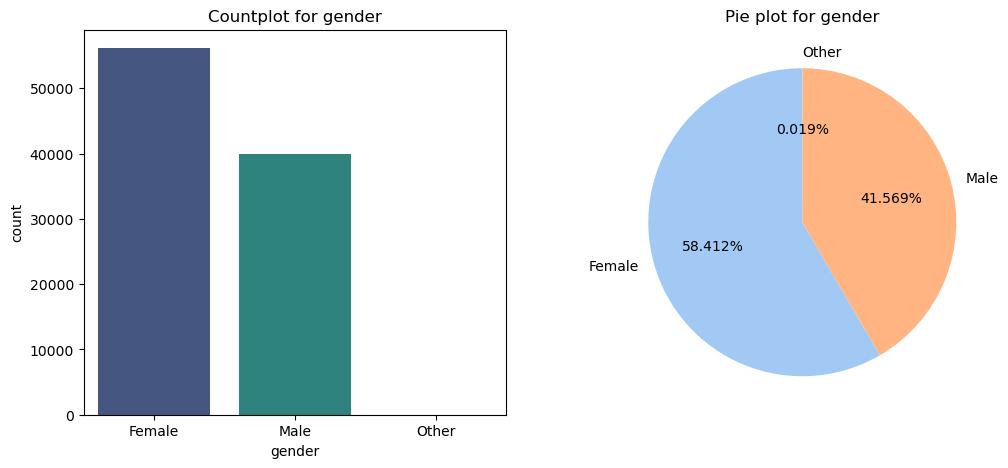

Univariate Analysis of hypertension


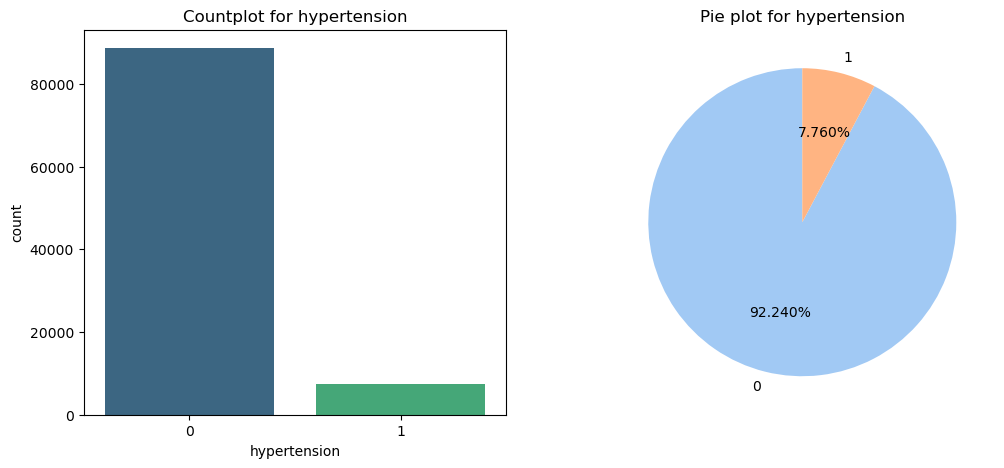

Univariate Analysis of heart_disease


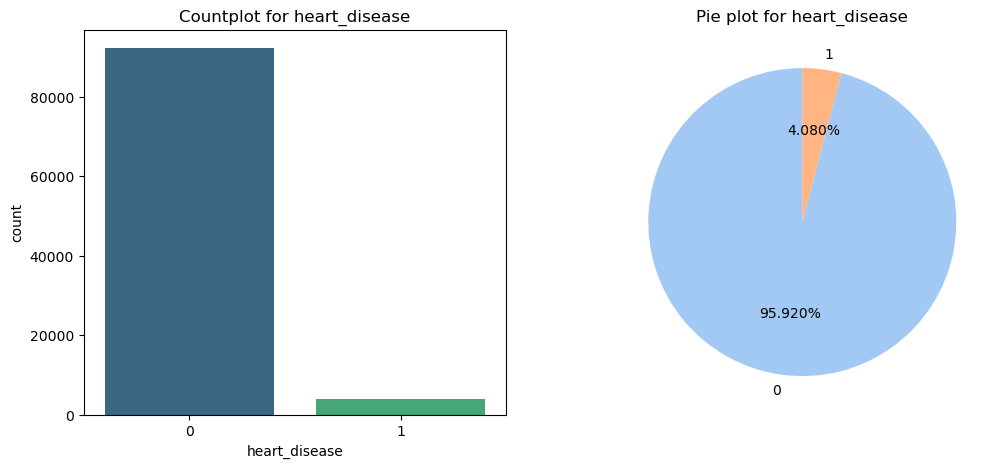

Univariate Analysis of smoking_history


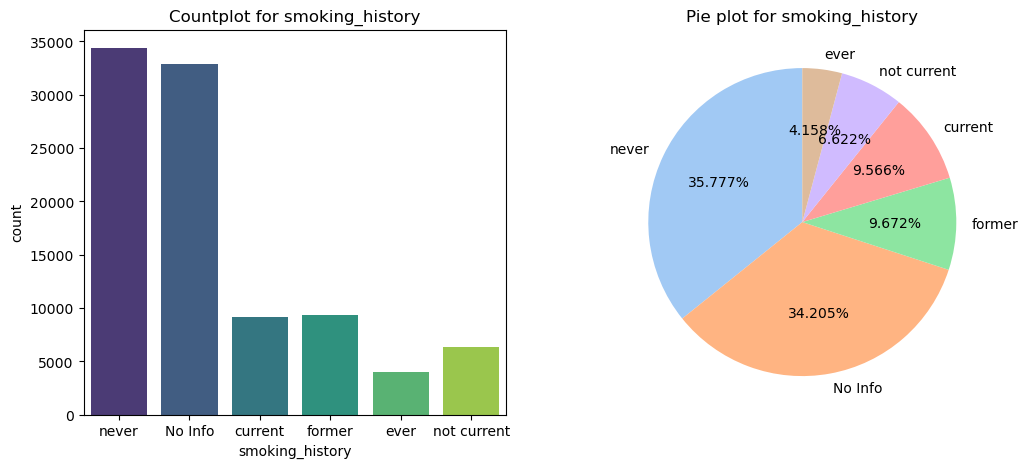

Univariate Analysis of diabetes


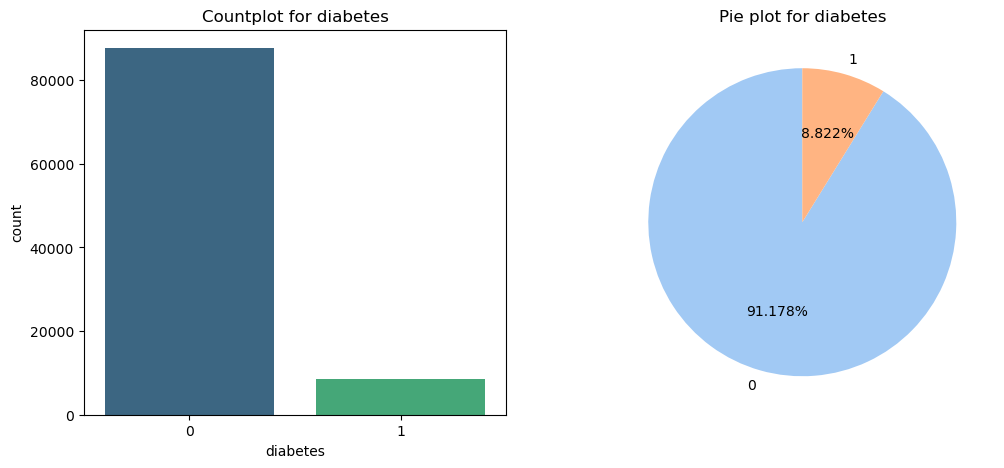

In [34]:
for col in non_numeric_cols :
    print(f'Univariate Analysis of {col}')
    univariate_analysis_cat(col)

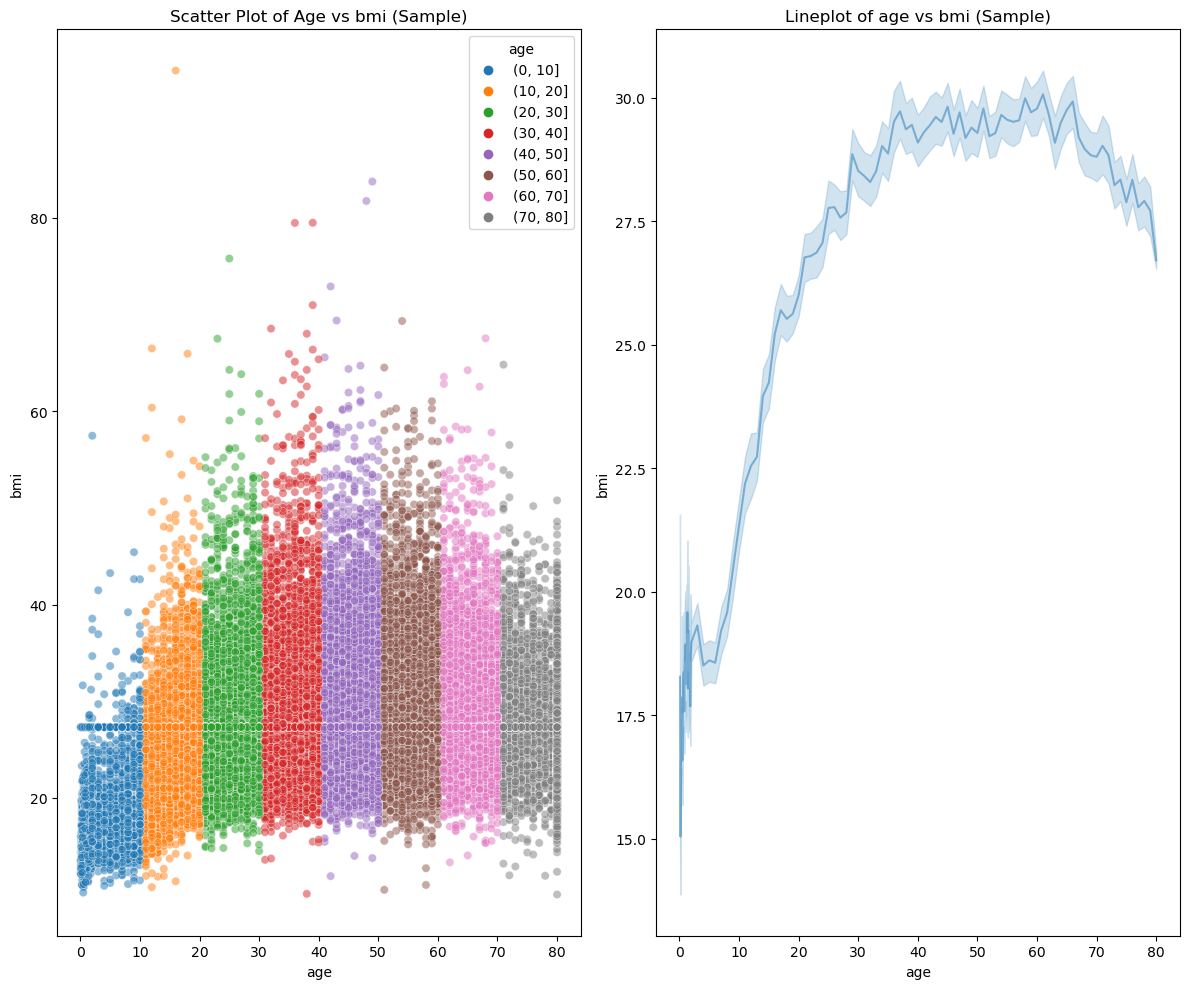

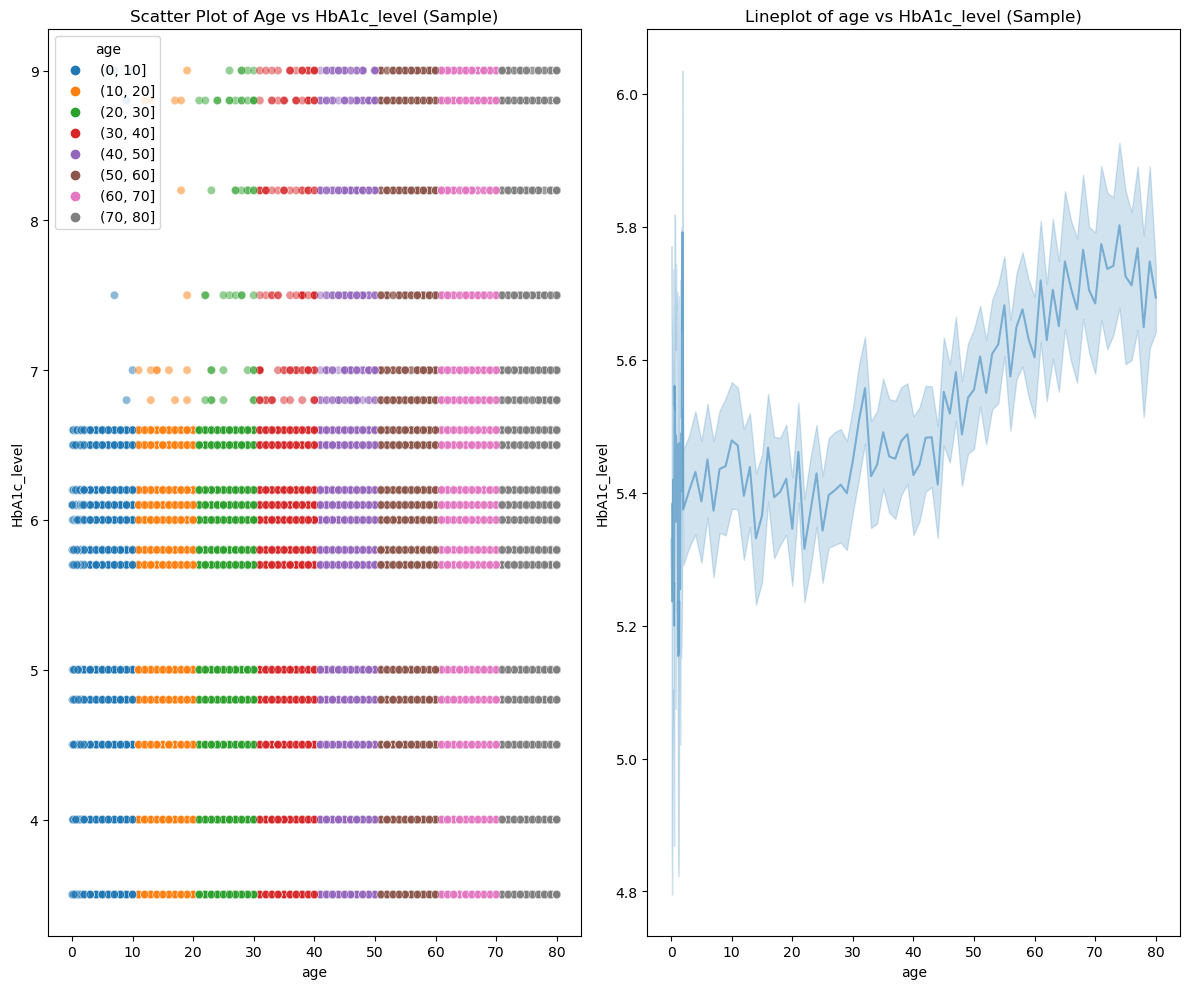

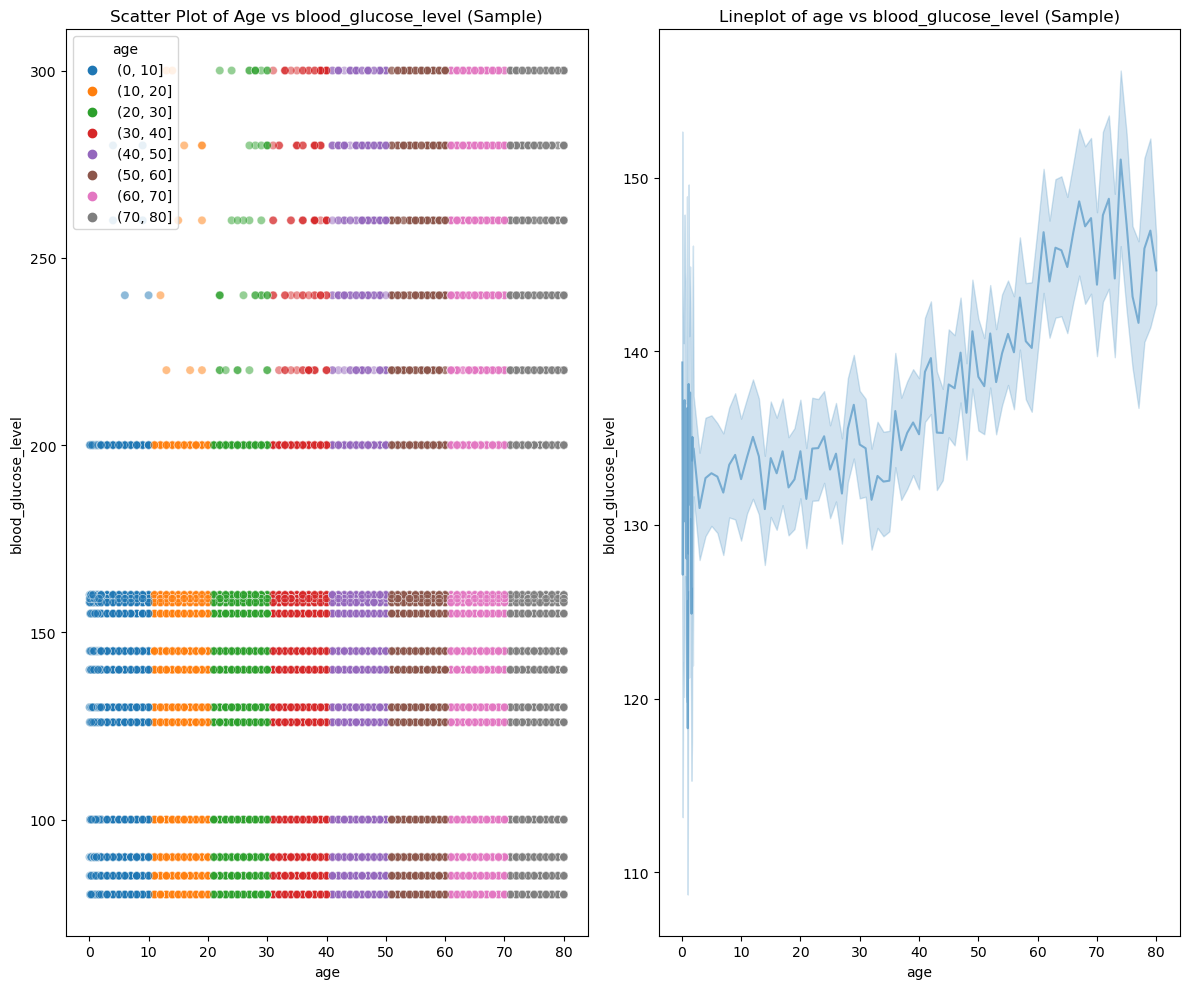

In [36]:
sample_size = 45000  
sample_df = df.sample(n=sample_size, random_state=42) 
age_group = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

for col in numeric_cols[1:]:
    fig, ax = plt.subplots(1, 2, figsize=(12, 10))
    sns.scatterplot(x='age', y=df[col], data=sample_df,hue=age_group, alpha=0.5,ax=ax[0])
    ax[0].set_title(f'Scatter Plot of Age vs {col} (Sample)')
    
    sns.lineplot(x='age',y=df[col],data=sample_df,alpha=0.5,ax=ax[1])
    ax[1].set_title(f'Lineplot of age vs {col} (Sample)')
    plt.tight_layout()
    plt.show()

In [38]:
print(sample_df['age'].mean())
print(df['age'].mean())

41.84585511111093
41.79432571297831


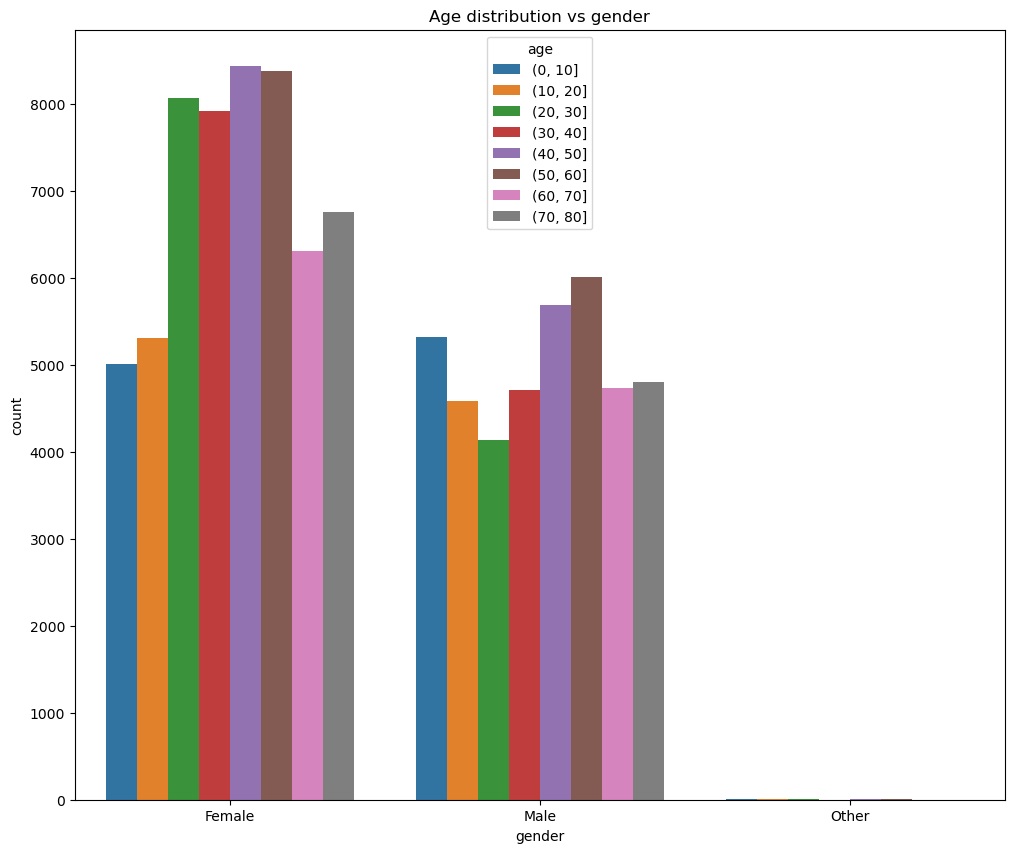

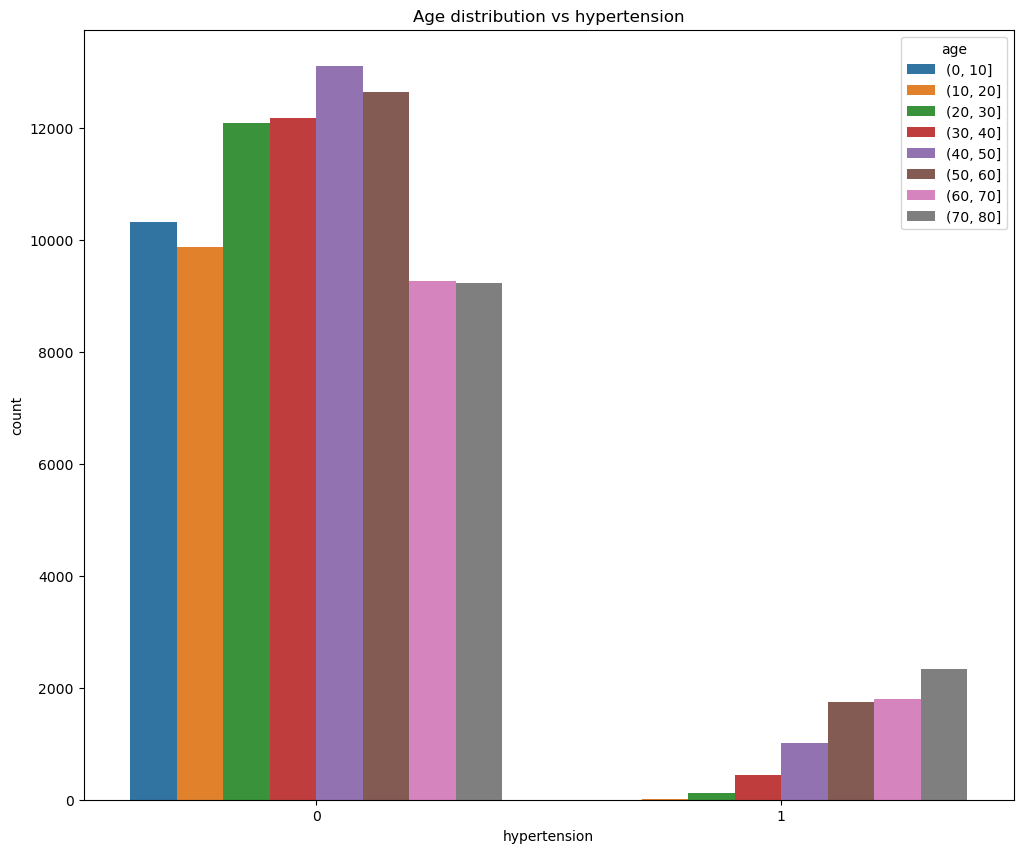

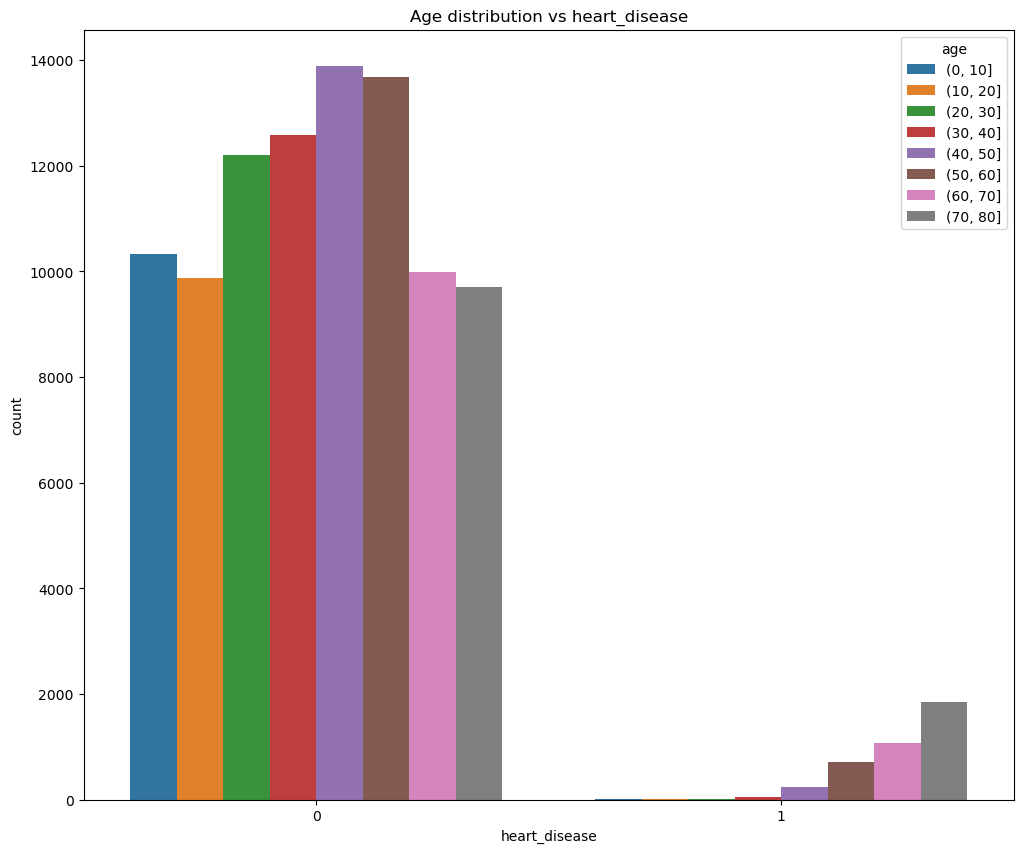

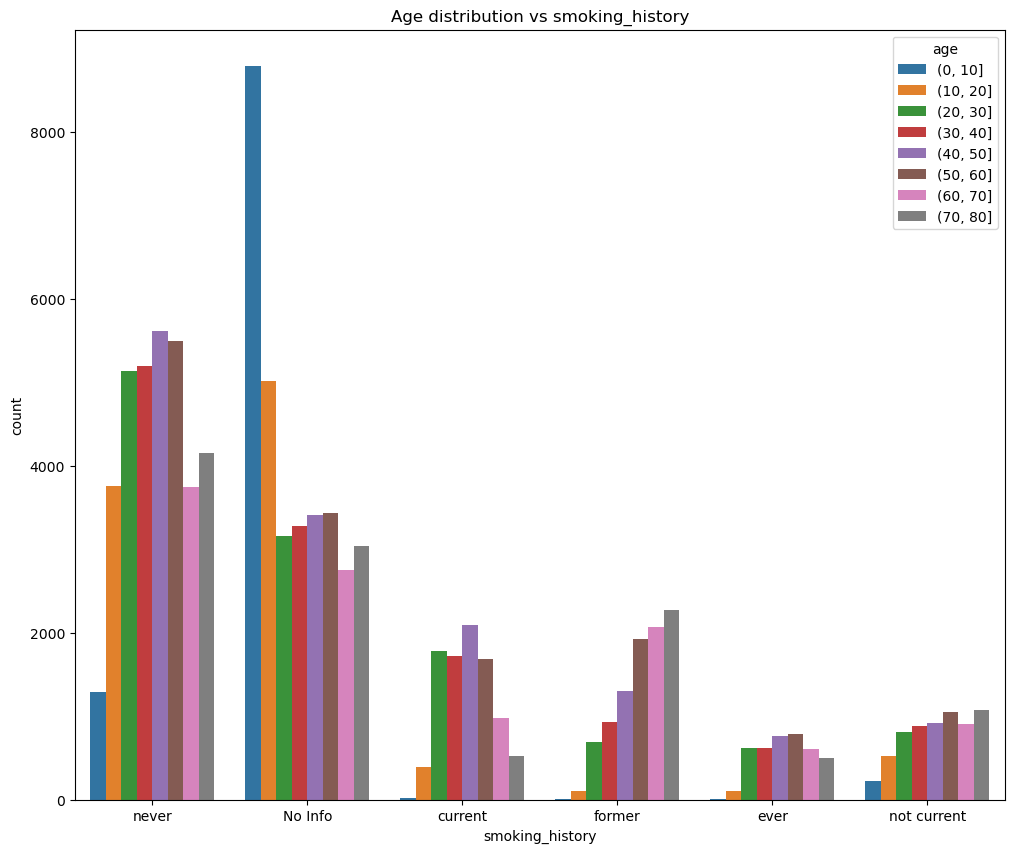

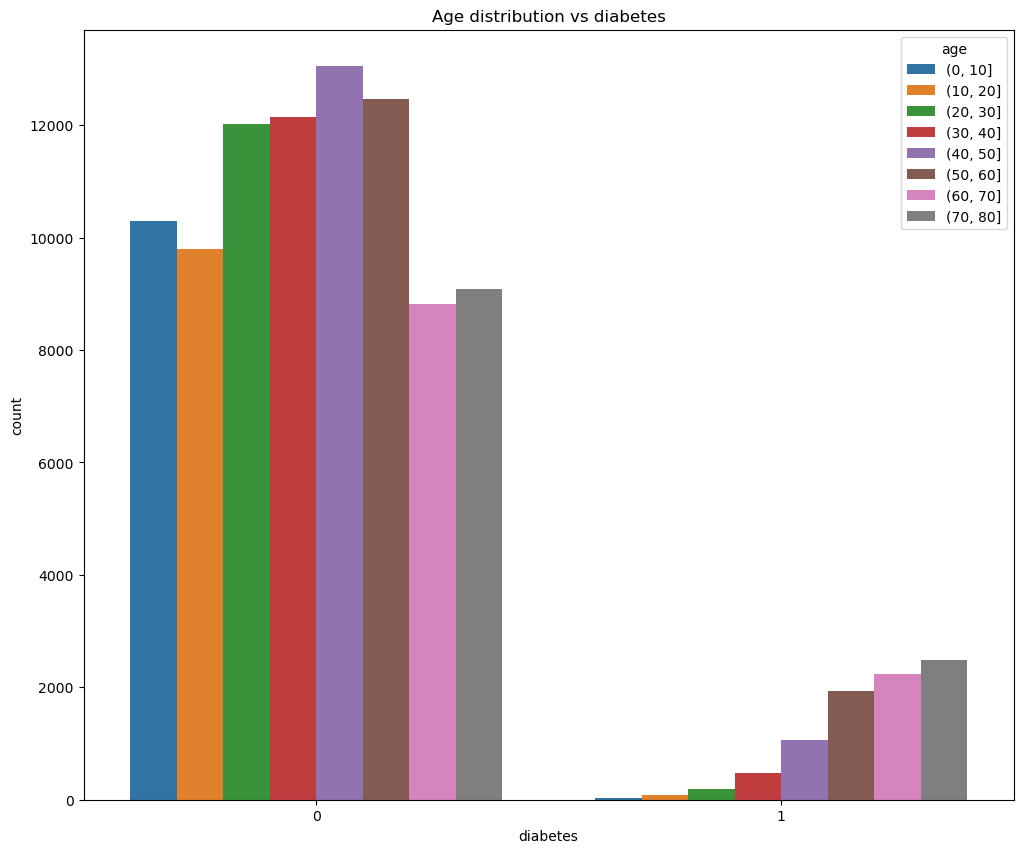

In [39]:
age_group = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])
for i in non_numeric_cols:
    plt.figure(figsize=(12,10))
    sns.countplot(x=df[i],data=df,hue=age_group)
    plt.title(f'Age distribution vs {i}')
    plt.show()

In [41]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in non_numeric_cols:
    sample_df[col]=le.fit_transform(sample_df[col])
sample_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2547,0,5.0,0,0,0,15.14,4.5,90,0
34774,1,19.0,0,0,4,22.74,6.6,85,0
71084,0,52.0,0,0,4,24.27,7.5,220,1
50584,1,55.0,0,0,0,27.32,5.7,85,0
80788,0,22.0,0,0,4,28.78,4.5,200,0
...,...,...,...,...,...,...,...,...,...
20000,0,13.0,0,0,0,27.32,6.5,200,0
1594,1,46.0,0,0,4,27.32,5.8,80,0
10788,0,58.0,0,0,0,27.32,3.5,80,0
36339,1,36.0,0,0,4,27.32,4.0,130,0


# Support Vector Machine Algorithm

In [43]:
x = sample_df.drop('diabetes', axis=1)
y = sample_df['diabetes']

In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn. model_selection import train_test_split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [49]:
model_svm = SVC(kernel = 'linear', random_state = 0)

In [51]:
model_svm.fit(X_train, Y_train)

SVC(kernel='linear', random_state=0)

In [52]:
y_pred = model_svm.predict(X_test)

In [54]:
print(accuracy_score(Y_test, y_pred) *100)

95.9037037037037


In [55]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     12358
           1       0.90      0.58      0.71      1142

    accuracy                           0.96     13500
   macro avg       0.93      0.79      0.84     13500
weighted avg       0.96      0.96      0.95     13500

